In [1]:
# Step 1: Import Libraries

import tensorflow as tf
import numpy as np
import keras
from keras import layers
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment as linear_assignment


In [ ]:
### SUPERVISED LEARNING APPROACH (SLA) ###

In [ ]:
# Step 2: Data Loading:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Defining required methods

def minmax(x):
    x_scaled=[]
    for i in range(len(x)):
        x_scaled.append(x[i].flatten())
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x_scaled)
    return x_scaled

def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 

def softmax(z):
    z=z.T
    for i in range(z.shape[0]):
        z[i] = np.exp(z[i])
        sum_ = sum(z[i])
        z[i] = z[i]/sum_
    return z.T

def calc_accuracy(p,y):
    p=p.T
    y=y.T
    p_class=[]
    y_class=[]
    for i in range(p.shape[0]):
        p_class.append(np.argmax(p[i]))
        y_class.append(np.argmax(y[i])) 
    return accuracy_score(y_class, p_class)*100

def calculate_loss(y,p):
    value = []
    y=y.T
    p=p.T
    for i in range(y.shape[0]):
        val = np.multiply(y[i],np.log(p[i]))
        value.append(sum(val))
    CCE = -(1 / y.shape[0]) *np.sum(value)
    return CCE

In [ ]:
# Step 3: Scaling Image Pixel Values 

x_train =minmax(x_train)
x_test  =minmax(x_test)

x_train =np.array(x_train).reshape(50000,32,32,3)
x_test  =np.array(x_test).reshape(10000,32,32,3)

In [ ]:
# Step 4: One Hot Encoding of target variable 

Train_y=[]

for i in range(y_train.shape[0]):
    val = [0 for j in range(10)]
    val[int(y_train[i])]=1
    Train_y.append(val)
    
y_train=np.asarray(Train_y)

Test_y=[]

for i in range(y_test.shape[0]):
    val = [0 for j in range(10)]
    val[int(y_test[i])]=1
    Test_y.append(val)
    
y_test=np.asarray(Test_y)

In [ ]:
# Step 5: Initialization of Variables 
  
epochs=700

learning_rate = 0.1

m=x_train.shape[0]

W1 = np.random.randn(300,3072)*0.1
b1 = np.zeros((300,1))
W2 = np.random.randn(10,300)*0.1
b2 = np.zeros((10,1))


In [ ]:
# Flattening the features: (32,32,3) --> (3072)
Train_x=[]
for i in range(x_train.shape[0]):
    Train_x.append(x_train[i].flatten())
    
x_train = np.asarray(Train_x)

Test_x=[]
for i in range(x_test.shape[0]):
    Test_x.append(x_test[i].flatten())
    
x_test = np.asarray(Test_x)

# Initialising loss_track and accuracy_track variables
losstrack_train = [] 
losstrack_test = [] 

train_accuracy = [] 
test_accuracy = [] 

x_train=x_train.T
y_train=y_train.T

x_test=x_test.T
y_test=y_test.T

In [ ]:
#Step 6: Training a Neural Network with 1 hidden layer using Gradient Descent Algorithm

for epoch in range(epochs):

    # Step 6.1: Use genesis equation y_pred = SM(W2.(W1X +b1)+b2)       
    # train
    Z1 = np.dot(W1,x_train) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)
    # test
    Z11 = np.dot(W1,x_test) + b1
    A11 = sigmoid(Z11)
    Z22 = np.dot(W2,A11) + b2
    A22 = softmax(Z22)

    # Step 6.2: Find Categorical Cross Entropy Loss (L) for predicted value A2 and truth value y
    # train
    CCE_train = calculate_loss(y_train,A2)
    losstrack_train.append(np.squeeze(CCE_train))
    #test
    CCE_test = calculate_loss(y_test,A22)
    losstrack_test.append(np.squeeze(CCE_test))

    # Step 6.3: Find dW1, db1, dW2, db2
    dZ2 = A2 - y_train
    dW2 = 1 / m * (np.dot(dZ2,A1.T))
    db2 = 1 / m * (np.sum(dZ2,axis = 1,keepdims = True))
    dZ1 = np.dot(W2.T,dZ2) * (A1*(1-A1))
    dW1 = 1 / m * (np.dot(dZ1,x_train.T))
    db1 = 1 / m * (np.sum(dZ1,axis = 1,keepdims = True))
        
    # Step 6.4: Update W1, W2, b1, b2 using learning rate
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2  

    
    # Step 6.5: Find Train and Test Accuracy
    train_acc = calc_accuracy(A2,y_train)
    test_acc  = calc_accuracy(A22,y_test)
    
    train_accuracy.append(np.squeeze(train_acc))
    test_accuracy.append(np.squeeze(test_acc))


    if epoch%1==0: 
        print("epoch : ",epoch+1,"/",epochs)
        print("train_acc = " + str(train_acc) )
        print("test_acc = " + str(test_acc) )
        print("loss = " + str(CCE_train) )
        print("")
        # print("test_loss = " + str(CCE_test) )


epoch :  1 / 700
train_acc = 9.914000000000001
test_acc = 10.02
loss = 2.8722237261031647

epoch :  2 / 700
train_acc = 9.42
test_acc = 9.120000000000001
loss = 2.415905767455912

epoch :  3 / 700
train_acc = 14.216000000000001
test_acc = 14.23
loss = 2.317602999122398

epoch :  4 / 700
train_acc = 13.533999999999999
test_acc = 13.61
loss = 2.3004045926974666

epoch :  5 / 700
train_acc = 15.366
test_acc = 15.620000000000001
loss = 2.2882767454083726

epoch :  6 / 700
train_acc = 16.04
test_acc = 16.220000000000002
loss = 2.2772136297998693

epoch :  7 / 700
train_acc = 16.832
test_acc = 17.330000000000002
loss = 2.2667124905857197

epoch :  8 / 700
train_acc = 17.477999999999998
test_acc = 17.84
loss = 2.2566719409678413

epoch :  9 / 700
train_acc = 18.09
test_acc = 18.529999999999998
loss = 2.2470530985744617

epoch :  10 / 700
train_acc = 18.72
test_acc = 18.84
loss = 2.2378309861922143

epoch :  11 / 700
train_acc = 19.31
test_acc = 19.39
loss = 2.2289840354389585

epoch :  12 / 7

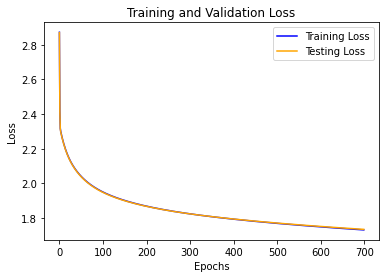

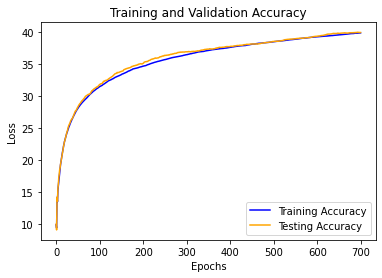

In [ ]:
# Step 7: Evaluation of SLA by tuning Tune-Hyperparameters

#loss Plot
plt.title('Training and Validation Loss')
plt.plot(losstrack_train,color='blue',label='Training Loss')
plt.plot(losstrack_test,color='orange', label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Accuracy Plot
plt.title('Training and Validation Accuracy')
plt.plot(train_accuracy,color='blue',label='Training Accuracy')
plt.plot(test_accuracy,color='orange', label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Confusion Matrix
Z1_test = np.dot(W1,x_test) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(W2,A1_test) + b2
A2_test = softmax(Z2_test)

y_test  = np.argmax(y_test,axis=0)
A2_test = np.argmax(A2_test,axis=0)

cm = confusion_matrix(y_test, A2_test)
print(cm)

[[469  40  61  17  15  18  29  52 227  72]
 [ 64 455  25  46  20  36  48  40  93 173]
 [126  47 261  73 124  87 140  65  51  26]
 [ 51  77  80 259  48 207 120  64  33  61]
 [ 74  33 148  63 301  72 160  96  30  23]
 [ 44  34  97 163  66 324 120  79  49  24]
 [ 16  51  80  93  92  78 497  35  16  42]
 [ 49  56  74  74  98  64  68 394  42  81]
 [138  78  15  26   6  43   9  25 566  94]
 [ 60 162  11  38  14  25  49  48 117 476]]


In [ ]:
# End Of SLA

In [ ]:
### UNSUPERVISED LEARNING APPROACH (USLA) ###

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
# Scaling Features

x_train = x_train / 255
x_test = x_test / 255

In [7]:
# Step 8: Convolutional AutoEncoder

input_img = tf.keras.Input(shape=(32, 32, 3))
 
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.Model(input_img, decoded)
optim = tf.keras.optimizers.SGD(learning_rate=0.3, name='SGD')
autoencoder.summary()
autoencoder.compile(optimizer=optim, loss='mse')
autoencoder.fit(x_train, x_train,epochs=25,batch_size=128,shuffle=True,validation_data=(x_test, x_test))

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)          

In [8]:
# Fetch the image features for entire dataset from latent layer of auto-encoder

encoder=keras.Model(input_img,encoded)

encoded_imgs=encoder.predict(x_train)
encoded_imgs=encoded_imgs.reshape(x_train.shape[0],128)

encoded_imgs_test=encoder.predict(x_test)
encoded_imgs_test=encoded_imgs_test.reshape(x_test.shape[0],128)


In [9]:
# Step 9: Kmeans clustering

kmeans=KMeans(n_clusters=10)
encoded_imgs_fit=kmeans.fit(encoded_imgs)

kmeans_test=KMeans(n_clusters=10)
encoded_imgs_fit_test=kmeans_test.fit(encoded_imgs_test)

In [10]:
# Step 10: Evalutation USLA

#finding train_accuracy
labels=encoded_imgs_fit.labels_

confusionmatrix=confusion_matrix(labels,y_train)

index = linear_assignment(-confusionmatrix)
index = list(index)
index[1] = list(index[1])
true_clusters=index[1]
print("True cluster label order:",true_clusters)
labelmap=[]
for i in range(10):
    labelmap.append(confusionmatrix[i][true_clusters[i]])

n = np.sum(confusionmatrix)
train_accuracy = np.sum(labelmap) / n * 100
print(train_accuracy)

True cluster label order: [3, 0, 9, 5, 4, 7, 6, 8, 2, 1]
21.086


In [11]:
 #finding train_accuracy
labels_test=encoded_imgs_fit_test.labels_

confusionmatrix_test=confusion_matrix(labels_test,y_test)

index = linear_assignment(-confusionmatrix_test)
index = list(index)
index[1] = list(index[1])
true_clusters=index[1]
print("True cluster label order:",true_clusters)
labelmap=[]
for i in range(10):
    labelmap.append(confusionmatrix_test[i][true_clusters[i]])

n = np.sum(confusionmatrix_test)
test_accuracy = np.sum(labelmap) / n * 100
print(test_accuracy)

True cluster label order: [5, 3, 1, 7, 8, 2, 0, 9, 4, 6]
20.77


In [12]:
#confusion Matrix for test data
for i in range(x_test.shape[0]):
    labels_test[i]=true_clusters[labels_test[i]]

confusionmatrix_test_data=confusion_matrix(labels_test,y_test)

print(confusionmatrix_test_data)

[[213  71  77  64  12  41  58  44  35  65]
 [ 30 122 103 124  87  81 138  54  29  41]
 [187  31 112  74  62 112  28  58 120  37]
 [ 41  47  56 142 114 153  58 132  44  27]
 [ 98  99 232 141 211 147 179 140  68  75]
 [ 46 159  42 103  22 200  48  92 105  59]
 [ 69  97 240 156 370 105 381 109  37  57]
 [ 81  73  57  93  40  81  70 112  28 106]
 [123 110  35  21  26  19   7  69 279 228]
 [112 191  46  82  56  61  33 190 255 305]]
